Epoch: 0050 cost= 0.412442774 W= 1.71427 b= 1.7817
Epoch: 0100 cost= 0.190173656 W= 1.48502 b= 2.4937
Optimization Finished!
Training cost= 0.190174 W= 1.48502 b= 2.4937 

Epoch: 0050 cost= 0.087687433 W= 1.32935 b= 2.97716
Epoch: 0100 cost= 0.040431909 W= 1.22364 b= 3.30546
Epoch: 0150 cost= 0.018642867 W= 1.15186 b= 3.52838
Epoch: 0200 cost= 0.008596140 W= 1.10312 b= 3.67975
Optimization Finished!
Training cost= 0.00859614 W= 1.10312 b= 3.67975 

Epoch: 0050 cost= 0.003963623 W= 1.07002 b= 3.78254
Epoch: 0100 cost= 0.001827620 W= 1.04755 b= 3.85233
Epoch: 0150 cost= 0.000842709 W= 1.03229 b= 3.89973
Epoch: 0200 cost= 0.000388569 W= 1.02192 b= 3.93191
Epoch: 0250 cost= 0.000179153 W= 1.01489 b= 3.95377
Epoch: 0300 cost= 0.000082612 W= 1.01011 b= 3.9686
Optimization Finished!
Training cost= 8.26123e-05 W= 1.01011 b= 3.9686 

Epoch: 0050 cost= 0.000038094 W= 1.00686 b= 3.97868
Epoch: 0100 cost= 0.000017566 W= 1.00466 b= 3.98552
Epoch: 0150 cost= 0.000008097 W= 1.00317 b= 3.99017
Epoch: 

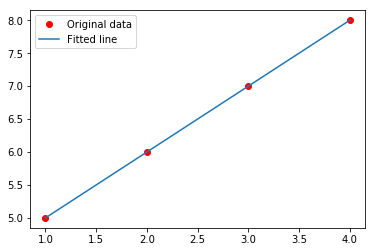

Epoch: 0050 cost= 0.000000154 W= 1.00046 b= 3.99864
Epoch: 0100 cost= 0.000000141 W= 1.00044 b= 3.9987
Optimization Finished!
Training cost= 1.41216e-07 W= 1.00044 b= 3.9987 

Epoch: 0050 cost= 0.000000131 W= 1.00042 b= 3.99875
Epoch: 0100 cost= 0.000000121 W= 1.00041 b= 3.9988
Epoch: 0150 cost= 0.000000112 W= 1.00039 b= 3.99884
Epoch: 0200 cost= 0.000000103 W= 1.00038 b= 3.99889
Optimization Finished!
Training cost= 1.02754e-07 W= 1.00038 b= 3.99889 

Epoch: 0050 cost= 0.000000094 W= 1.00036 b= 3.99894
Epoch: 0100 cost= 0.000000086 W= 1.00034 b= 3.99899
Epoch: 0150 cost= 0.000000080 W= 1.00033 b= 3.99902
Epoch: 0200 cost= 0.000000074 W= 1.00032 b= 3.99906
Epoch: 0250 cost= 0.000000068 W= 1.00031 b= 3.99909
Epoch: 0300 cost= 0.000000064 W= 1.0003 b= 3.99912
Optimization Finished!
Training cost= 6.38838e-08 W= 1.0003 b= 3.99912 

Epoch: 0050 cost= 0.000000060 W= 1.00029 b= 3.99915
Epoch: 0100 cost= 0.000000057 W= 1.00028 b= 3.99917
Epoch: 0150 cost= 0.000000054 W= 1.00027 b= 3.9992
Epoc

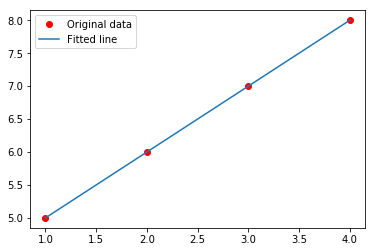

[0.19017366, 0.00859614, 8.2612314e-05, 1.685346e-07, 1.4121647e-07, 1.0275394e-07, 6.3883846e-08, 3.6433534e-08]


In [2]:
import tensorflow as tf
import numpy
import matplotlib.pyplot as plt
rng = numpy.random

rate_list=[0.05,0.005]
epoch_list=[100,200,300,400]
j=[]
learning_rate = 0.005
#training_epochs = 1000
display_step = 50

train_X = numpy.asarray([1.,2.,3.,4.])
train_Y = numpy.asarray([5.,6.,7.,8.])
n_samples = train_X.shape[0]

X = tf.placeholder("float")
Y = tf.placeholder("float")

W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

pred = tf.add(tf.multiply(X, W), b)

cost = tf.reduce_sum(tf.pow(pred-Y, 2))/(2*n_samples)

#optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)

init = tf.global_variables_initializer()

with tf.Session() as sess:
    sess.run(init)
    for rate in rate_list:
        optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
        for training_epochs in epoch_list:
            #optimizer = tf.train.GradientDescentOptimizer(rate).minimize(cost)
            for epoch in range(training_epochs):
                for (x, y) in zip(train_X, train_Y):
                    sess.run(optimizer, feed_dict={X: x, Y: y})
                if (epoch+1) % display_step == 0:
                    c = sess.run(cost, feed_dict={X: train_X, Y:train_Y})
                    print("Epoch:", '%04d' % (epoch+1), "cost=", "{:.9f}".format(c), "W=", sess.run(W), "b=", sess.run(b))
            print("Optimization Finished!")
            training_cost = sess.run(cost, feed_dict={X: train_X, Y: train_Y})
            print("Training cost=", training_cost, "W=", sess.run(W), "b=", sess.run(b), '\n')
            j.append(training_cost)
        plt.plot(train_X, train_Y, 'ro', label='Original data')
        plt.plot(train_X, sess.run(W) * train_X + sess.run(b), label='Fitted line')
        plt.legend()
        plt.show()
    
print(j)



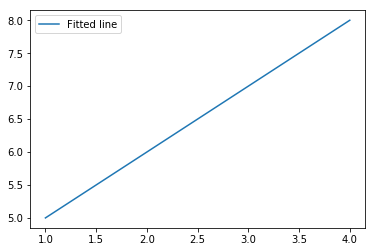

In [3]:
import matplotlib.pyplot as plt
import numpy as np
x_arr=np.array(train_X)
y_arr=np.array(train_Y)

sess2=tf.Session()
plt.plot(x_arr, y_arr, label='Fitted line')
plt.legend()
plt.show()
